In [16]:
import cv2
import numpy as np  
import matplotlib.pyplot as plt 

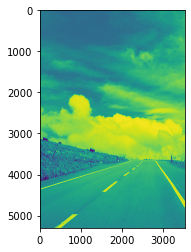

In [10]:
img = cv2.imread("Datasets/Driving_1.jpg") #reading color image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting to grayscale image

plt.imshow(gray)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

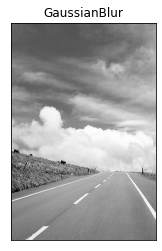

In [11]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blur, cmap='gray')
plt.title('GaussianBlur'), plt.xticks([]), plt.yticks([])
plt.show

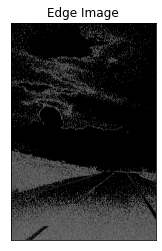

In [12]:
edges = cv2.Canny(img,50,150)
plt.imshow(edges,cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_yellow = np.array([20,100,100], dtype= 'uint8')
upper_yellow = np.array([30,255,255], dtype= 'uint8')

mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
mask_white = cv2.inRange(gray, 200 ,255)
mask_yw = cv2.bitwise_or(mask_white, mask_yellow)
mask_yw_image = cv2.bitwise_and(gray, mask_yw)

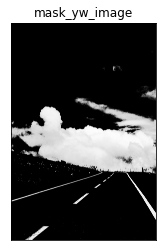

In [14]:
plt.imshow(mask_yw_image, cmap='gray')
plt.title('mask_yw_image'), plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
#convert into grey scale image
def canny_edge_detector(image):
      
    # Convert the image color to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
      
    # Reduce noise from the image
    blur = cv2.GaussianBlur(gray_image, (5, 5), 0) 
    canny = cv2.Canny(blur, 50, 150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    mask = np.zeros_like(image)
      
    # Fill poly-function deals with multiple polygon
    cv2.fillPoly(mask, polygons, 255) 
      
    # Bitwise operation between canny image and mask image
    masked_image = cv2.bitwise_and(image, mask) 
    return masked_image

def create_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (0.5))
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
          
        # It will fit the polynomial and the intercept and slope
        parameters = np.polyfit((x1, x2), (y1, y2), 1) 
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
              
    left_fit_average = np.average(left_fit, axis = 0)
    right_fit_average = np.average(right_fit, axis = 0)
    left_line = create_coordinates(image, left_fit_average)
    right_line = create_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for x1, y1, x2, y2 in lines:
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image


In [21]:
# Path of dataset directory
cap = cv2.VideoCapture("road_1.mp4") 
while(cap.isOpened()):
    ret, frame = cap.read()
    canny_image = canny_edge_detector(frame)
    cropped_image = region_of_interest(canny_image)
      
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 100, 
                            np.array([]), minLineLength = 40, 
                            maxLineGap = 5) 
      
    averaged_lines = average_slope_intercept(frame, lines) 
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1) 
    cv2.imshow("results", combo_image)
      
    # When the below two will be true and will press the 'q' on
    # our keyboard, we will break out from the loop
      
    # # wait 0 will wait for infinitely between each frames. 
    # 1ms will wait for the specified time only between each frames
    if cv2.waitKey(1) & 0xFF == ord('q') or 0xFF == ord('Q'):      
        break
  
# close the video file
cap.release() 
  
# destroy all the windows that is currently on
cv2.destroyAllWindows() 

<ipython-input-21-b47c7394e1b1>:12: RankWarning: Polyfit may be poorly conditioned
  averaged_lines = average_slope_intercept(frame, lines)


OverflowError: signed integer is greater than maximum